In [2]:
# !pip install numpy
# !pip install pandas
# !pip install csv
# !pip install matplotlib
# !pip install seaborn
# !pip install tqdm

In [3]:
# !pip install --upgrade pip

Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pickle

Get dataframes

In [7]:
from data.read_data import *
students = get_Students()
random_square_df = get_square_df()
random_rhombus_df = get_rhombus_df()
random_circle_df = get_circle_df()

Load the ‘piles’ if we already computed them using RSK algorithm:

In [ ]:
with open('data/RSK_piles_circle.pkl', 'rb') as f:
    circle_piles = pickle.load(f)
with open('data/RSK_piles_real_students.pkl', 'rb') as f:
    piles = pickle.load(f)
with open('data/RSK_piles_square.pkl', 'rb') as f:
    square_piles = pickle.load(f)
with open('data/RSK_piles_rhombus.pkl', 'rb') as f:
    rhombus_piles = pickle.load(f)

In [8]:
def check_sorted(arr):
    for i in range(1, len(arr)):
        if arr[i][1] < arr[i-1][1]:
            print(i)
            return False
    return True

RSK algorithm

In [9]:
def insert_to_pile(element, pile):
    # enter element to the sorted array "pile", and return the next element
    low = 0
    high = len(pile)-1
    while low <= high: # binary search
        mid = (low+high)//2
        if pile[mid][1] <= element[1]:
            low = mid + 1
        else:
            high = mid - 1
    pile.insert(low, element) # insert element
    next_element = pile.pop(low + 1)  # remove and return the next element for RSK
    return next_element

In [10]:
def RSK(df):
    df = df.sort_values(by=df.columns[0])
    df = df.reset_index(drop = True)
    piles = []
    for i in tqdm(range(df.shape[0])):
        if not piles:
            piles.append([df.iloc[i]])
        else:
            flag = True
            element = df.iloc[i] # first element to add to piles
            for pile in piles:
                if element[1] >= pile[-1][1]:
                    pile.append(element)
                    flag = False
                    break
                else:
                    element = insert_to_pile(element, pile)
            if flag:
                piles.append([element])
    return piles       

In [16]:
def plot_piles(piles, filename, title):
    lists_lengths = [len(sublist) for sublist in piles]
    list_indices = range(len(piles))
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create a bar plot
    ax.bar(list_indices, lists_lengths, color='skyblue', edgecolor='lightblue', label='List Lengths')
    
    # Create a line plot
    ax.plot(list_indices, lists_lengths, color='blue', linestyle='-', label='Line Connects')
    
    # Set x-axis ticks to match list indices
    ax.set_xticks(list_indices)
    
    # Set labels and title
    ax.set_xticks(range(0, len(piles), 100))
    ax.set_xlabel('Pile Number')
    ax.set_ylabel('Length of Piles')
    ax.set_title('RSK Algorithm - ' + title )
    ax.grid(False)
    plt.savefig("plots/png/RSK_"+ filename +".png") # save as png
    plt.savefig("plots/pdf/RSK_"+ filename +".pdf") # save as pdf
    
    plt.show()

Performing RSK on different datasets

In [14]:
piles = RSK(students) # get real students piles

100%|██████████| 136939/136939 [14:58<00:00, 152.35it/s]


In [ ]:
square_piles = RSK(random_square_df) # get random square piles

In [ ]:
rhombus_piles = RSK(random_rhombus_df) # get random rhombus piles

In [ ]:
circle_piles = RSK(random_circle_df) # get random circle piles

Save piles into pickle files:

In [ ]:
with open('RSK_piles_real_students.pkl', 'wb') as f:
    pickle.dump(piles, f)
    
with open('RSK_piles_square.pkl', 'wb') as f:
    pickle.dump(square_piles, f)
    
with open('RSK_piles_rhombus.pkl', 'wb') as f:
    pickle.dump(rhombus_piles, f)
    
with open('RSK_piles_circle.pkl', 'wb') as f:
    pickle.dump(circle_piles, f)

Plot all the piles:

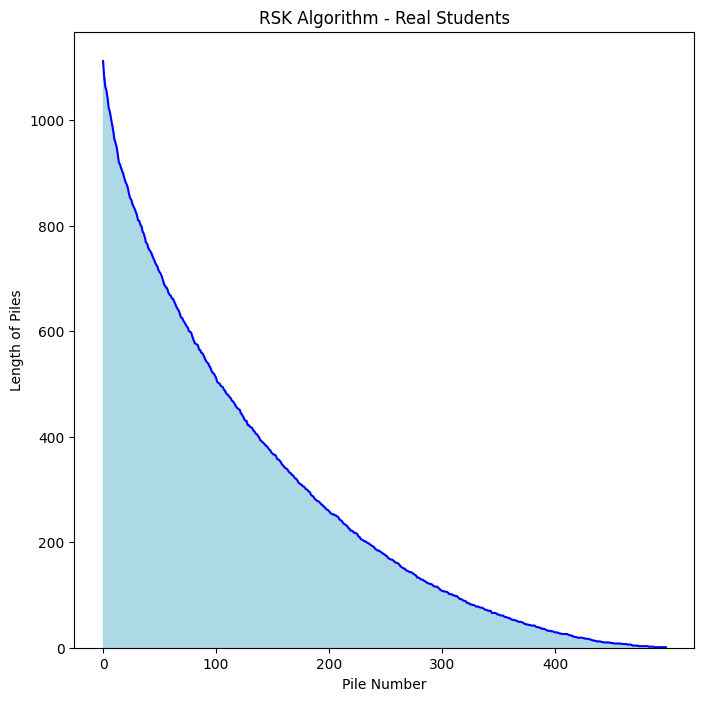

In [17]:
plot_piles(piles,"real_students" ,"Real Students") 
plot_piles(square_piles, "random_square", "Random Square") 
plot_piles(rhombus_piles, "random_rhombus", "Random Rhombus")
plot_piles(circle_piles, "random_circle", "Random Circle")